# Climate observation data visualisation using Pandas

* Read in station information
* Visualise station distribution
* Read in the time series data at one station
* Visualise time series data
---

- Authors: NCI Virtual Research Environment Team
- Keywords: Climate observation, Pandas, data visualisation
- Create Date: 2020-Jul
    
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Australian Climate Observation Reference Network (ACORN) yj45

The Australian Climate Observations Reference Network (ACORN) has been developed to monitor climate variability and change in Australia.

The  ACORN – Surface Air Temperature (ACORN-SAT) network is specific to temperature. 

The dataset employs the peer-reviewed and published data analysis techniques and takes advantage of more than 100 years of digitised observational data to provide a daily record of Australian temperatures since 1910.

The data is comparable through time, making adjustments for historic changes in observing practices and observing locations, which enable climates researchers to better understand long-term changes in monthly and seasonal climate, as well as changes in day-to-day weather, such as the frequency of heat and cold extremes.

POC: Rob Smalley (robert.smalley@bom.gov.au)

In [ ]:
text_file = "/g/data/yj45/acorn/sat/version_2/site_data/acorn_sat_v2_stations.txt"

# read in lat, lon and elevation
from numpy import loadtxt
stnnum = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(0), unpack=True)
lat = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(1), unpack=True)
lon = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(2), unpack=True)
elev = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(3), unpack=True)

# read in strings: station number and location
#f = open(text_file , 'rb')
#with contextlib.closing(f):
#    words = (line.split(' ') for line in f)
#    print(words)

Create a panda dataframe using station location information:

In [7]:
st = pd.DataFrame({
    'lat':lat,
    'lon':lon,
    'elevation':elev
})
st

,lat,lon,elevation
0,-14.30,126.65,23.0
1,-18.23,127.66,422.0
2,-17.95,122.24,7.4
3,-20.37,118.63,6.4
4,-21.18,119.75,182.3
...,...,...,...
107,-40.99,148.35,19.7
108,-43.49,147.15,55.0
109,-42.89,147.33,50.5
110,-42.99,147.07,65.0


Plot lat/lon as scatter plot

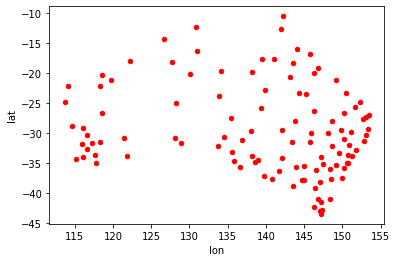

In [8]:
import matplotlib.pyplot as plt
st.plot(kind='scatter',x='lon',y='lat',color='red')
plt.show()

Plot elevation as bar plot

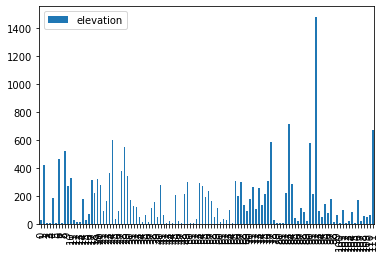

In [9]:
st.plot(kind='bar',y='elevation',figsize=(11, 2.25))

In [ ]:
#dat = pd.read_csv('http://dapds00.nci.org.au/thredds/fileServer/yj45/acorn/sat/version_2/site_data/tmin.096003.daily.csv')

Read in one station data and plot the time series using `pandas.plot()`

In [27]:
dat = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.001019.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)

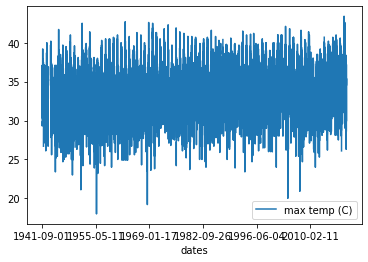

In [34]:
dat.plot(kind='line',x='dates',y='max temp (C)')

Read data of two stations.

In [113]:
st1 = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.001019.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)
st2 = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.002012.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)
st1

,dates,max temp (C),site number,site name
0,1941-09-01,29.8,NaN,NaN
1,1941-09-02,29.8,NaN,NaN
2,1941-09-03,29.3,NaN,NaN
3,1941-09-04,37.1,NaN,NaN
4,1941-09-05,30.9,NaN,NaN
...,...,...,...,...
28392,2019-05-27,34.8,NaN,NaN
28393,2019-05-28,33.2,NaN,NaN
28394,2019-05-29,32.8,NaN,NaN
28395,2019-05-30,32.1,NaN,NaN


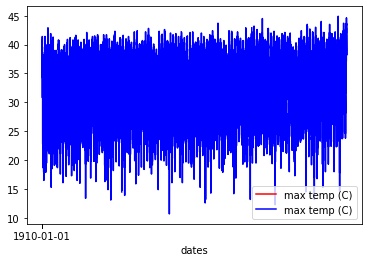

In [115]:
# gca stands for 'get current axis'
ax = plt.gca()

st1.plot(kind='line',x='dates',y='max temp (C)', color='red', ax=ax)
st2.plot(kind='line',x='dates',y='max temp (C)', color='blue',ax=ax)

plt.show()

Using `dask.dataframe()` to read in multiple csv files.

In [36]:
import os
import dask
filename = os.path.join('/g/data/yj45/acorn/sat/version_2/site_data/', '*.csv')
filename

'/g/data/yj45/acorn/sat/version_2/site_data/*.csv'

In [73]:
import dask.dataframe as dd
dd = dd.read_csv(filename,names=['dates','max temp (C)','site number','site name'],skiprows=2)
dd.head()

,dates,max temp (C),site number,site name
0,1941-09-01,29.8,NaN,NaN
1,1941-09-02,29.8,NaN,NaN
2,1941-09-03,29.3,NaN,NaN
3,1941-09-04,37.1,NaN,NaN
4,1941-09-05,30.9,NaN,NaN


Get all the data within the last twenty years.

In [124]:
teny = dd.loc['2010-01-01':'2019-12-31'].compute()
teny

,dates,max temp (C),site number,site name
20100,1996-09-12,36.8,NaN,NaN
20101,1996-09-13,37.0,NaN,NaN
20102,1996-09-14,33.5,NaN,NaN
20103,1996-09-15,33.4,NaN,NaN
20104,1996-09-16,36.1,NaN,NaN
...,...,...,...,...
20185,1999-09-06,-0.2,NaN,NaN
20186,1999-09-07,-3.0,NaN,NaN
20187,1999-09-08,1.2,NaN,NaN
20188,1999-09-09,4.6,NaN,NaN


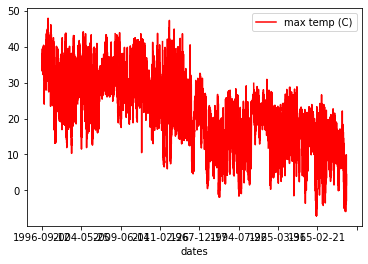

In [125]:
%matplotlib inline
teny.plot(kind='line',x='dates',y='max temp (C)', color='red')